<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Curso-Dominando-Data-Science---Flai/blob/main/Combina%C3%A7%C3%A3o_de_Modelos_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cobinação de Modelos**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
dados = pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv')

In [16]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
dados.smoker = dados.smoker.map({'yes': 1, 'no': 0})
dados.charges = dados.charges/1000
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


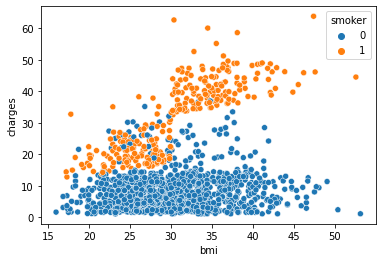

In [19]:
sns.scatterplot(x='bmi',y='charges', hue='smoker', data=dados)

In [20]:
X= dados[['bmi', 'charges']]
y = dados['smoker']

# **Validação Cruzada**

In [21]:
from sklearn.model_selection import KFold, cross_val_score

In [22]:
kf= KFold(n_splits=50, shuffle=True)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Regressão Logística**

In [25]:
log_model = LogisticRegression()
log_acc = cross_val_score(log_model, X, y, cv=kf, scoring='accuracy')
log_acc = log_acc.mean()
print(log_acc)

0.9326780626780626


## **KNN**

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_acc = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
knn_acc = knn_acc.mean()
print(knn_acc)

0.9627350427350428


## **Decision Tree**

In [29]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_acc = cross_val_score(tree_model, X, y, cv=kf, scoring='accuracy')
tree_acc = tree_acc.mean()
print(tree_acc)

0.9633048433048432


# **Combinação por Votos**

In [33]:
#Combinação por votos hard

from sklearn.ensemble import VotingClassifier

modelos = [('Reg. Log.',log_model),('KNN',knn_model),
           ('Árvore de Decisão',tree_model)]

vot_model = VotingClassifier(modelos, voting='hard')

vot_acc = cross_val_score(vot_model, X, y, cv=kf, scoring='accuracy')
vot_acc = vot_acc.mean()
print(vot_acc)

0.9648433048433048


In [34]:
#gráfico de Região
from mlxtend.plotting import plot_decision_regions

In [35]:
vot_model.fit(X,y)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                              DecisionTreeC

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


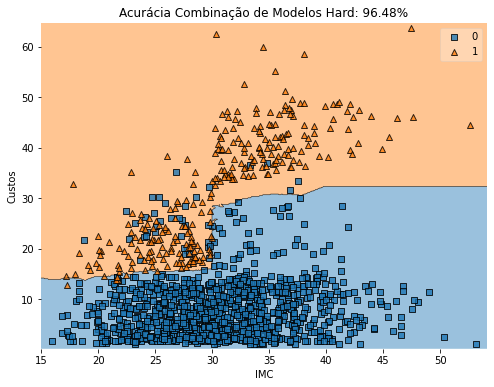

In [38]:
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=vot_model, legend=1)

plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*vot_acc))  
plt.show()

In [39]:
# Combinação por votos 'Soft'

#Combinação por votos hard

from sklearn.ensemble import VotingClassifier

modelos = [('Reg. Log.',log_model),('KNN',knn_model),
           ('Árvore de Decisão',tree_model)]

vot_model = VotingClassifier(modelos, voting='soft')

vot_acc = cross_val_score(vot_model, X, y, cv=kf, scoring='accuracy')
vot_acc = vot_acc.mean()
print(vot_acc)

0.964985754985755


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


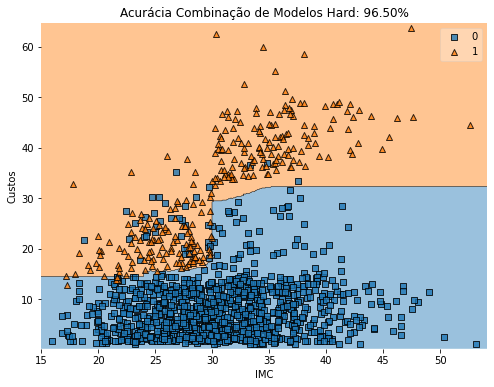

In [40]:
vot_model.fit(X,y)
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=vot_model, legend=1)

plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*vot_acc))  
plt.show()

# **Bagging**

In [47]:
from sklearn.ensemble import BaggingClassifier

modelo_base= LogisticRegression()
modelo_base1 = KNeighborsClassifier(n_neighbors = 17)
modelo_base2 = DecisionTreeClassifier(max_depth = 3)


In [48]:
bagg_model = BaggingClassifier(n_estimators=100, base_estimator=modelo_base)

bagg_acc= cross_val_score(bagg_model,X,y,cv=kf, scoring='accuracy')
bagg_acc = bagg_acc.mean()
print(bagg_acc)

0.9312820512820512


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


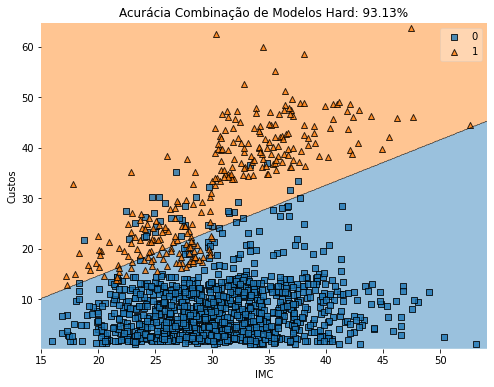

In [49]:

bagg_model.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = bagg_model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*bagg_acc))  
plt.show()

# **Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier(n_estimators=100, max_depth=5)

rand_acc = cross_val_score(rand_model, X, y, cv = kf, scoring = 'accuracy')
rand_acc = rand_acc.mean()
print(rand_acc)

0.9642450142450143


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


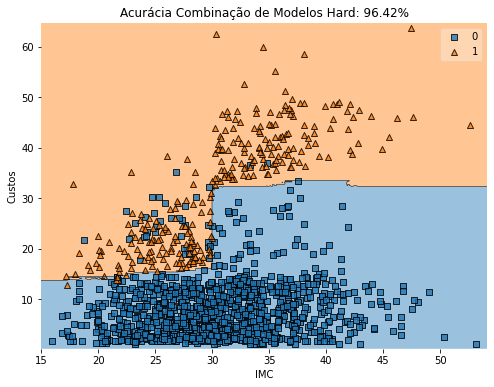

In [54]:
rand_model.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = rand_model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia Combinação de Modelos Hard: {:.2f}%'.format(100*rand_acc))  
plt.show()

In [55]:
print(log_acc,knn_acc,tree_acc, vot_acc, bagg_acc, rand_acc, sep='\n')

0.9326780626780626
0.9627350427350428
0.9633048433048432
0.964985754985755
0.9312820512820512
0.9642450142450143


# **Métricas de Classificação**